# Create a regular gridded dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tarfile
from io import StringIO

## Crop survey area

In [2]:
required_file_path = '1038_XYZ/1038/spaulo_rjaneiro_rj.xyz'
file_content = None
with tarfile.open('../data/1038_XYZ.tar.xz', 'r') as tar:
    for member in tar.getmembers():
        if member.name == required_file_path:
            file_content = tar.extractfile(member).read().decode('ISO-8859-1')
            break
if file_content is None:
    raise FileNotFoundError(f"The specified file '{required_file_path}' was not found in the tar archive.")

lines = file_content.splitlines()
filtered_lines = [line for line in lines if not (line.startswith('LINE') or line.startswith('TIE'))]
filtered_data = '\n'.join(filtered_lines)
filtered_data_io = StringIO(filtered_data)

column_names = [
    'UTME', 'UTMN', 'LONG', 'LAT', 'MAGR', 'THC', 'UC', 'KC', 'CTC', 
    'MAGB', 'MAGC', 'MAGD', 'THB', 'UB', 'KB', 'CTB', 'FIDU', 'TEMP', 
    'ALTE', 'ALTB'
]
df = pd.read_csv(filtered_data_io, 
                 delim_whitespace=True,
                 names=column_names,
                 skiprows=6)

/tmp/ipykernel_22257/226600208.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filtered_data_io,


In [3]:
df

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC,MAGB,MAGC,MAGD,THB,UB,KB,CTB,FIDU,TEMP,ALTE,ALTB
0,602900.0,7445078.0,-43.995255,-23.099503,434.32,0.00,7.31,82.50,251.70,24089.0,24099.41,24122.84,13.0,37.0,77.0,704.0,31726.0,54416.10,300.00,0.0
1,602903.0,7445177.0,-43.995224,-23.098618,426.28,32.83,0.00,63.61,278.84,24081.0,24091.42,24114.84,29.0,29.0,68.0,715.0,31727.0,54417.20,300.00,0.0
2,602907.0,7445275.0,-43.995193,-23.097733,418.24,12.63,0.00,13.74,367.68,24073.0,24083.42,24106.85,21.0,31.0,50.0,751.0,31728.0,54418.29,300.00,0.0
3,602910.0,7445374.0,-43.995178,-23.096832,410.20,10.10,0.00,95.47,486.12,24065.0,24075.43,24098.86,20.0,34.0,81.0,799.0,31729.0,54419.39,300.00,0.0
4,602913.0,7445472.0,-43.995148,-23.095947,402.16,12.63,0.00,74.44,498.46,24057.0,24067.43,24090.86,21.0,33.0,73.0,804.0,31730.0,54420.49,300.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433231,192938.0,7695057.0,-41.949890,-20.818878,184.03,9.10,17.05,4.83,207.69,24080.0,24132.79,24136.34,14.0,22.0,46.0,288.0,128879.0,46708.13,241.71,0.0
433232,192835.0,7695053.0,-41.950882,-20.818909,179.13,12.69,25.02,0.00,248.32,24075.0,24127.80,24131.38,16.0,28.0,46.0,312.0,128880.0,46709.83,241.10,0.0
433233,192733.0,7695050.0,-41.951859,-20.818909,174.23,16.05,8.66,30.52,224.33,24070.0,24122.80,24126.41,18.0,18.0,56.0,300.0,128881.0,46711.53,238.66,0.0
433234,192630.0,7695046.0,-41.952850,-20.818924,167.32,19.12,4.50,0.00,205.80,24063.0,24115.81,24119.45,20.0,16.0,38.0,292.0,128882.0,46713.23,234.70,0.0


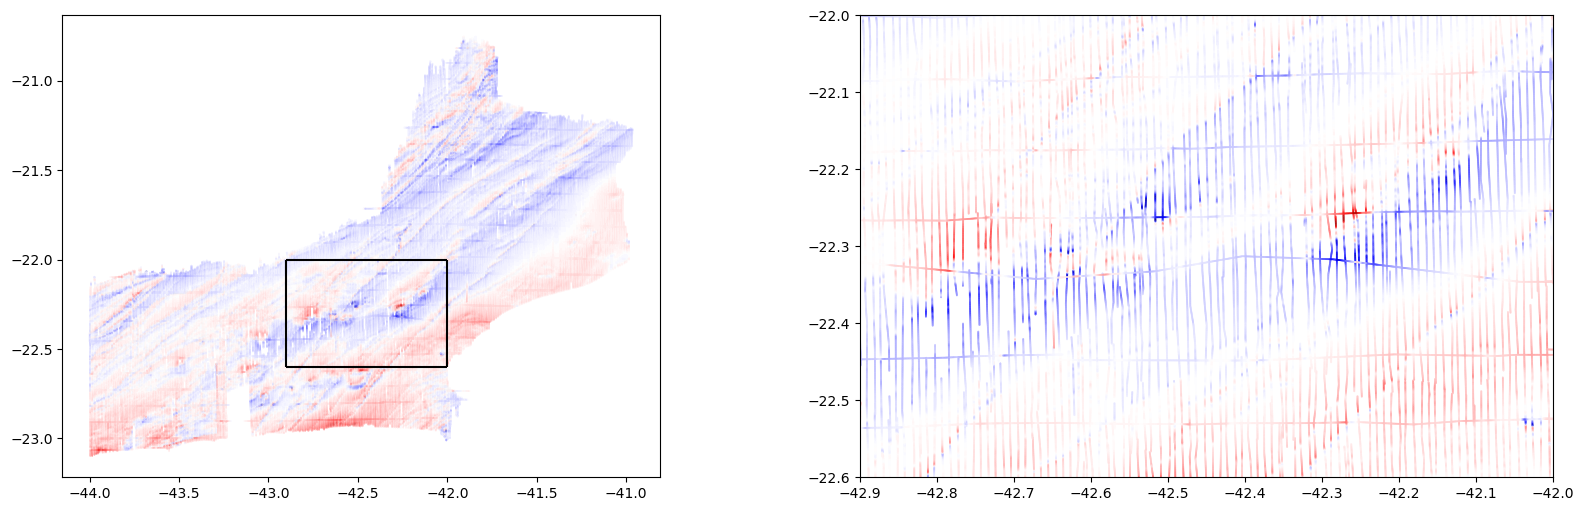

In [6]:
xmin = -42.9
xmax = -42.0
ymin = -22.6
ymax = -22.0

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(df.LONG, df.LAT, s=0.001, c=df.MAGR, cmap='seismic')
plt.vlines(x=[xmin, xmax], ymin=ymin, ymax=ymax, color='black')
plt.hlines(y=[ymin, ymax], xmin=xmin, xmax=xmax, color='black')
plt.axis('scaled')
plt.subplot(1,2,2)
plt.scatter(df.LONG, df.LAT, s=0.1, c=df.MAGR, cmap='seismic')
plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [10]:
# crop area
data = df[
    (df['LONG'] >= xmin) & (df['LONG'] <= xmax) &
    (df['LAT'] >= ymin) & (df['LAT'] <= ymax)
]
# keep columns needed
data = data[['LONG', 'LAT', 'ALTE','MAGR']]
data = data.rename(columns={
    'LONG': 'longitude',
    'LAT': 'latitude',
    'ALTE': 'height_m',
    'MAGR': 'tfa_nT',
})
data

,longitude,latitude,height_m,tfa_nT
118382,-42.899185,-22.454605,188.37,3.03
118383,-42.899216,-22.453720,197.82,6.02
118384,-42.899246,-22.452835,205.44,7.02
118385,-42.899277,-22.451950,208.18,7.01
118386,-42.899307,-22.451065,205.74,7.01
...,...,...,...,...
422362,-42.023544,-22.073761,269.75,6.20
422363,-42.024536,-22.073776,263.96,16.26
422364,-42.025513,-22.073776,255.73,30.33
422365,-42.026505,-22.073776,247.19,46.39


## Use GB EQS to interpolate onto a regular grid